In [1]:
from helper.data_handler import *
from classifier.classification_handler import *

In [2]:
data_handler = DataHandler("all")
clh = ClassificationHandler(data_handler.data_dict)

In [3]:
import helper.visuals as vs

In [4]:
import pandas as pd
all_data = pd.DataFrame()
for key, value in data_handler.data_dict.items():
    all_data = pd.concat([all_data, value])

In [5]:
from sklearn.preprocessing import StandardScaler
feature_data = all_data.drop(["RecommendedAct"], axis=1)

In [6]:
scaled_data = StandardScaler().fit_transform(feature_data)

In [7]:
pca_data = pd.DataFrame(scaled_data, columns=["M(GSR_Res)", "Std(GSR_Res)", "M(HBR)", "Std(HBR)", "M(RR)", "Std(RR)", \
                                  "M(Motion)", "Std(Motion)", "M(ST)", "Std(ST)", "MHR(RR)", "MRRI(RR)", "NN50(RR)", \
                                  "PNN50(RR)", "RMSSD(RR)", "SDNN(RR)"])

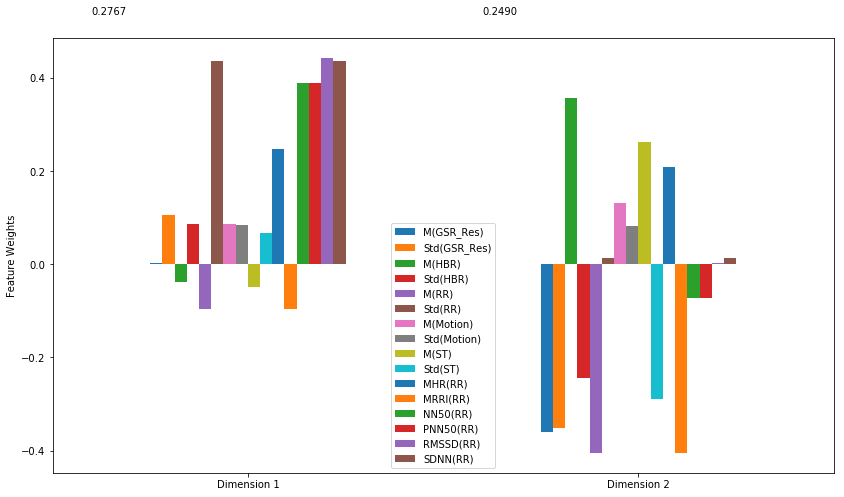

In [8]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 2)
pca = pca.fit(pca_data)

# Generate PCA results plot
pca_results = vs.pca_results(pca_data, pca);

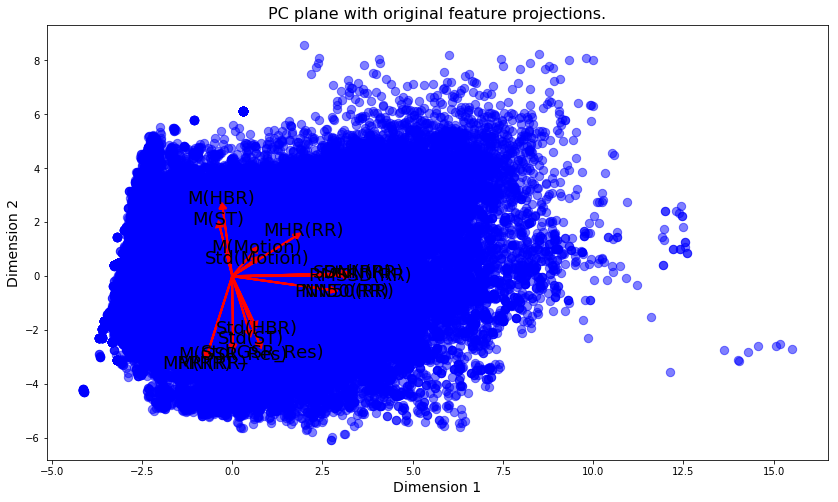

In [12]:
reduced_data = pca.transform(pca_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.biplot(all_data, reduced_data, pca);

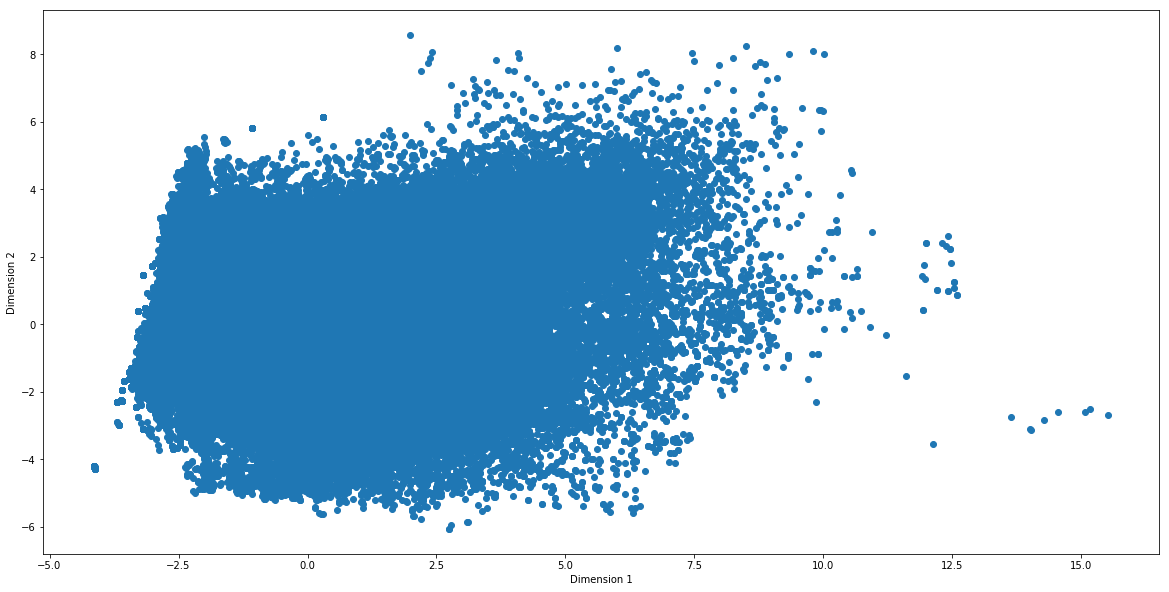

In [14]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();